# PREPARACION DE DATOS

En esta fase se crean nuevas variables o transformar las variables existentes, para dar mejor respuesta a nuestros objetivos.

## SETUP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
import sqlalchemy as sa

%config IPCompleter.greedy = True

pd.options.display.max_columns = None

C:\Users\dt_i01626\AppData\Local\Temp\ipykernel_16980\975634074.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## CARGA DE DATOS

In [2]:
con = sa.create_engine('sqlite:///../Datos/airbnb2.db')

In [3]:
df = pd.read_sql('df', con = con)
df.head()

,level_0,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_cleansed,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,index,barrio,precio_m2
0,0,14222,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,87710233,Palermo,-34.58617,-58.41036,Entire home/apt,32123.0,7,8,161,Palermo,t,2,1.0,1.0,1.0,114,4.77,4.89,4.87,45,Palermo,2917
1,1,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Nuñez,-34.53892,-58.46599,Private room,24230.0,29,1,0,Nuñez,f,1,1.0,1.0,1.0,0,NaN,NaN,NaN,43,Nuñez,2643
2,2,20429,Rental unit in Buenos Aires · 1 bedroom · 1 be...,77065,Constitucion,-34.62260,-58.38704,Entire home/apt,28268.0,15,1,0,Constitucion,f,2,1.0,1.0,1.0,0,NaN,NaN,NaN,8,Constitucion,1650
3,3,24713,Rental unit in Buenos Aires · ★4.66 · 1 bedroo...,100743,San Nicolas,-34.60254,-58.37811,Entire home/apt,32242.0,1,8,78,San Nicolas,t,3,1.0,1.0,2.0,377,4.66,4.90,4.84,10,San Nicolas,1734
4,4,26258,Rental unit in Buenos Aires · 1 bedroom · 2 be...,111013,Almagro,-34.59997,-58.41238,Entire home/apt,20151.0,7,1,364,Almagro,f,2,1.0,1.0,2.0,2,3.50,5.00,5.00,25,Almagro,1974


In [4]:
df.drop(columns = 'level_0', inplace = True)

In [5]:
df

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_cleansed,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,index,barrio,precio_m2
0,14222,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,87710233,Palermo,-34.586170,-58.410360,Entire home/apt,32123.0,7,8,161,Palermo,t,2,1.0,1.0,1.0,114,4.77,4.89,4.87,45,Palermo,2917
1,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Nuñez,-34.538920,-58.465990,Private room,24230.0,29,1,0,Nuñez,f,1,1.0,1.0,1.0,0,NaN,NaN,NaN,43,Nuñez,2643
2,20429,Rental unit in Buenos Aires · 1 bedroom · 1 be...,77065,Constitucion,-34.622600,-58.387040,Entire home/apt,28268.0,15,1,0,Constitucion,f,2,1.0,1.0,1.0,0,NaN,NaN,NaN,8,Constitucion,1650
3,24713,Rental unit in Buenos Aires · ★4.66 · 1 bedroo...,100743,San Nicolas,-34.602540,-58.378110,Entire home/apt,32242.0,1,8,78,San Nicolas,t,3,1.0,1.0,2.0,377,4.66,4.90,4.84,10,San Nicolas,1734
4,26258,Rental unit in Buenos Aires · 1 bedroom · 2 be...,111013,Almagro,-34.599970,-58.412380,Entire home/apt,20151.0,7,1,364,Almagro,f,2,1.0,1.0,2.0,2,3.50,5.00,5.00,25,Almagro,1974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20059,1054384310344899698,Rental unit in Buenos Aires · ★New · Studio · ...,254111419,Balvanera,-34.600971,-58.408723,Entire home/apt,12897.0,1,4,265,Balvanera,t,2,1.0,1.0,1.0,0,NaN,NaN,NaN,7,Balvanera,1628
20060,1054392542343527929,Rental unit in Buenos Aires · ★New · 1 bedroom...,1409800,Recoleta,-34.596400,-58.408710,Entire home/apt,37998.0,2,104,270,Recoleta,t,3,1.0,1.0,2.0,0,NaN,NaN,NaN,41,Recoleta,2510
20061,1054423956590467495,Rental unit in Buenos Aires · ★New · 1 bedroom...,112264250,Monserrat,-34.611055,-58.380419,Entire home/apt,18975.0,3,1,269,Monserrat,f,2,1.0,1.0,2.0,0,NaN,NaN,NaN,22,Monserrat,1942
20062,1054454529559701183,Rental unit in Buenos Aires · ★New · 1 bedroom...,552579433,San Nicolas,-34.600817,-58.378126,Entire home/apt,24182.0,3,1,87,San Nicolas,f,2,1.0,1.0,1.0,0,NaN,NaN,NaN,10,San Nicolas,1734


## PREPARACION DE LAS VARIABLES

###  Creacion de kpis de palancas

Primero vamos a crear las variables de análisis, es decir las que habíamos identificado como los Kpis que usaremos en las palancas que influyen sobre el negocio.

Habíamos dicho que eran 3:

* precio por noche: esta ya la tenemos directamente en la variable price, pero vamos a revisarla para ver que la entendemos bien.
* ocupación: tenemos availability_365 pero hay que transformarla.
* precio del inmueble: esta tendremos que crearla con variables externas así que la dejamos para después.

**Empezamos con el precio.**

La documentación no aclara si el precio es por todo el inmueble, o si en el caso de que se alquile una habitación es por habitación.

Es un dato clave para poder hacer la valoración de los potenciales ingresos de un inmueble.

Vamos a intentar entenderlo analizando el precio medio por tipo de alquiler.

Es importante filtrar por solo un distrito para no incluir el efecto "zona".

Así que primero elegimos un distrito que tenga muchos datos.

In [6]:
df.neighbourhood.value_counts()

neighbourhood
Palermo              5557
Recoleta             2800
San Nicolas          1384
Belgrano             1124
Monserrat            1072
Retiro                947
Almagro               914
Balvanera             864
Villa Crespo          795
San Telmo             568
Caballito             507
Nuñez                 473
Colegiales            423
Chacarita             388
Villa Urquiza         320
Constitucion          317
Saavedra              170
San Cristobal         153
Barracas              128
Flores                119
Coghlan                99
Villa Ortuzar          97
Villa Del Parque       89
Boca                   78
Boedo                  78
Villa Devoto           71
Parque Chas            63
Parque Patricios       59
Parque Chacabuco       59
Villa Pueyrredon       54
Paternal               43
Agronomia              36
Floresta               35
Villa Santa Rita       32
Villa Gral. Mitre      29
Mataderos              20
Villa Luro             18
Velez Sarsfield        1

In [7]:
df.loc[df.neighbourhood == 'Palermo',:].groupby('room_type').price.mean()

room_type
Entire home/apt    29022.165662
Private room       18587.325700
Shared room        18494.619048
Name: price, dtype: float64

Conclusión:

* alquilar el apartamento tiene un precio medio de 29.000 pesos
* alquilar una habitación tiene un precio medio de 18600 o 18500 pesos según sea compartida o privada
* por tanto para calcular los "ingresos" de un inmueble sí deberemos multiplicar el precio el precio por el número de habitaciones cuando sea de los tipos Private room o Shared room

Ahora bien, multiplicar el precio por el total de habitaciones puede sesgar artificialmente al alza la capacidad de generar ingresos de un inmueble.

Ya que si se alquila por habitaciones no es probable que siempre esté al 100%

Por tanto deberíamos ponderarlo por el porcentaje medio de habitaciones alquiladas.

No tenemos ese dato, pero supongamos que es del 70%. (Esto es lo que se conoce como el factor de ajuste, el cual es muy arbitrario y depende del conocimiento del negocio).

Podemos crear la variable precio total aplicando apply sobre una función personalizada.

In [8]:
def crear_precio_total(registro):
    if (registro.beds > 1) & ((registro.room_type == 'Private room') | (registro.room_type == 'Shared room')):
        salida = registro.price * registro.beds * 0.7
    else:
        salida = registro.price
    return(salida)

df['precio_total'] = df.apply(crear_precio_total, axis = 1)

Comprobamos

In [9]:
df[['room_type', 'price', 'beds', 'precio_total']].head(60)

,room_type,price,beds,precio_total
0,Entire home/apt,32123.0,1.0,32123.0
1,Private room,24230.0,1.0,24230.0
2,Entire home/apt,28268.0,1.0,28268.0
3,Entire home/apt,32242.0,2.0,32242.0
4,Entire home/apt,20151.0,2.0,20151.0
5,Entire home/apt,29937.0,3.0,29937.0
6,Entire home/apt,31436.0,2.0,31436.0
7,Entire home/apt,20151.0,1.0,20151.0
8,Entire home/apt,36345.0,1.0,36345.0
9,Entire home/apt,20151.0,1.0,20151.0


**Ahora vamos con la ocupación.**

La variable que tenemos que nos permite medir esto es availability_365.

Esta variable nos dice el número de días a un año vista que el inmueble NO está ocupado.

Por tanto nos interesaría transformarla a una medida más directa de ocupación, por ejemplo el % del año que SI está ocupada.

Podemos hacerlo con una tranformación directa.

In [10]:
df['ocupacion'] = (((365 - df.availability_365) / 365) * 100).astype('int64')

Comprobamos

In [11]:
df[['availability_365' , 'ocupacion']]

,availability_365,ocupacion
0,161,55
1,0,100
2,0,100
3,78,78
4,364,0
...,...,...
20059,265,27
20060,270,26
20061,269,26
20062,87,76


**Ranking de barrios de caba con mayor ocupación**

In [17]:
df.groupby('neighbourhood').ocupacion.mean().sort_values(ascending=False)

neighbourhood
Villa Riachuelo      100.000000
Puerto Madero         69.923077
Villa Gral. Mitre     55.482759
Boca                  52.192308
Villa Real            50.250000
Palermo               45.792694
Saavedra              45.652941
San Nicolas           45.557803
Monserrat             44.979478
Retiro                44.963041
Villa Crespo          44.836478
Parque Avellaneda     44.666667
San Cristobal         44.359477
Recoleta              44.351071
Constitucion          44.309148
San Telmo             44.272887
Agronomia             44.138889
Parque Chacabuco      44.135593
Balvanera             43.914352
Velez Sarsfield       43.625000
Nuñez                 43.171247
Belgrano              43.162811
Colegiales            43.047281
Villa Santa Rita      43.031250
Caballito             42.546351
Mataderos             42.300000
Paternal              41.348837
Coghlan               40.909091
Villa Urquiza         40.521875
Almagro               40.518600
Boedo                 40.4

### Transformación de varaibles de análisis

Algunas de las preguntas semilla están dirigidas a comprobar, cómo se comporta el precio o la ocupación según otras variables como el número de habitaciones, la media de valoraciones, etc.

Normalmente podremos hacer mejor estos análisis si discretizamos la variable de análisis.

En nuestro caso las candidatas para este análisis son: accommodates, bedrooms, beds y number_of_reviews.

En bedrooms tiene sentido una discretización más personalizada. En las otras podemos hacerla automática.

**Discretizar bedrooms**

Comenzamos por evaluar la distribución de los datos

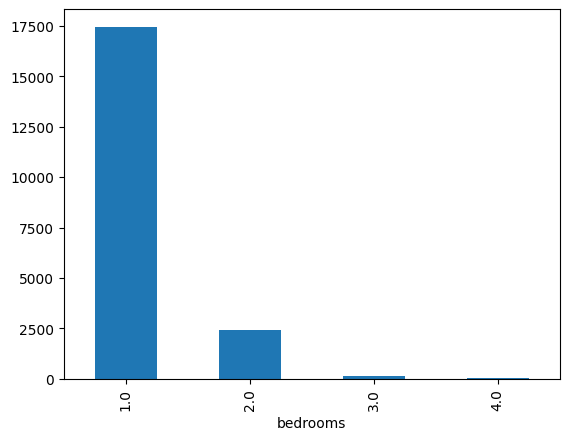

In [18]:
df.bedrooms.value_counts().plot.bar();

Vamos a discretizar para 1,2,3 y más de 3.

Podemos usar np.select

In [19]:
condiciones = [ df.bedrooms == 1,
                df.bedrooms == 2,
                df.bedrooms == 3,
                df.bedrooms > 3
              ]

resultados = ['01_Una', '02_Dos', '03_Tres', '04_Cuatro o mas']

df['bedrooms_disc'] = np.select(condiciones, resultados, default = -999)

Comprobamos

In [20]:
df['bedrooms_disc'].value_counts()

bedrooms_disc
01_Una             17459
02_Dos              2421
03_Tres              142
04_Cuatro o mas       42
Name: count, dtype: int64

**Discretizar accommodates, beds y number_of_reviews**

Vamos a usar qcut para discritizar con percentiles 0.5, 0.8, 1

**accommodates**

<Axes: xlabel='accommodates'>

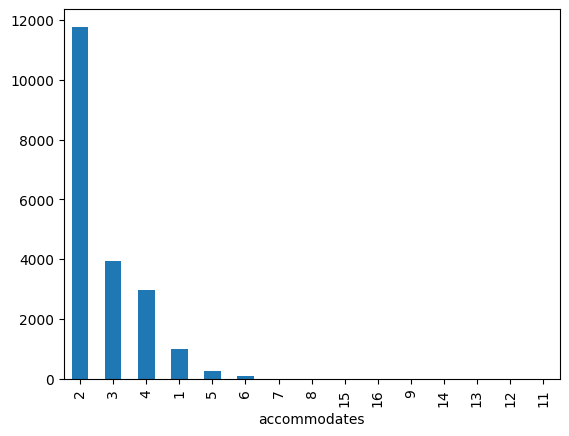

In [21]:
df.accommodates.value_counts(dropna=False).plot.bar()

<Axes: xlabel='accommodates'>

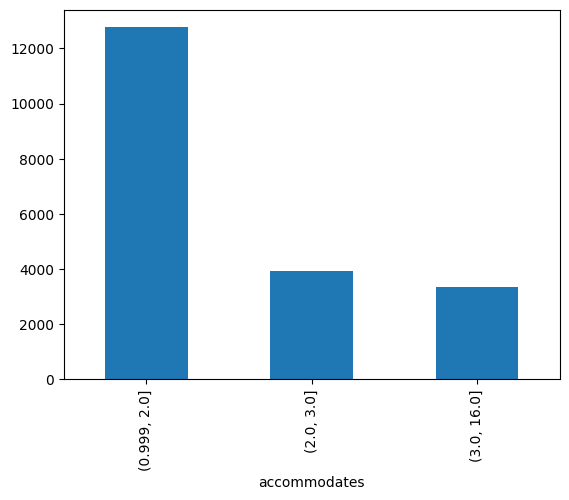

In [22]:
pd.qcut(df.accommodates,[0,0.5,0.8,1]).value_counts().plot.bar()

In [23]:
df['accommodates_disc'] = pd.qcut(df.accommodates,[0,0.5,0.8,1],
       labels = ['0-2', '3','4-16'])

<Axes: xlabel='accommodates_disc'>

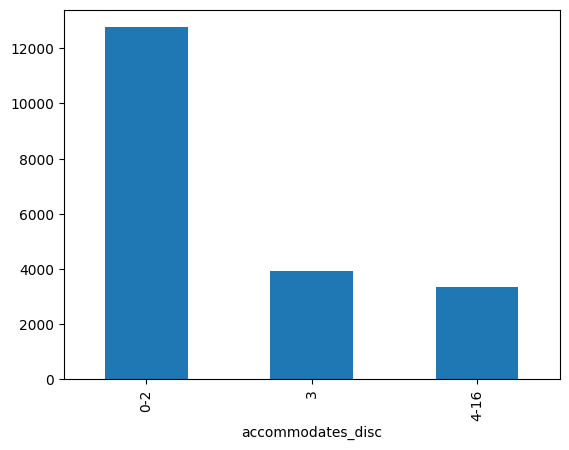

In [24]:
df['accommodates_disc'].value_counts().plot.bar()

**beds**

<Axes: xlabel='beds'>

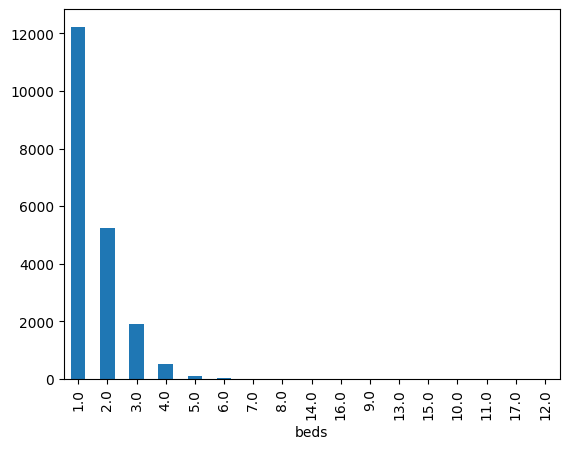

In [25]:
df.beds.value_counts(dropna=False).plot.bar()

<Axes: xlabel='beds'>

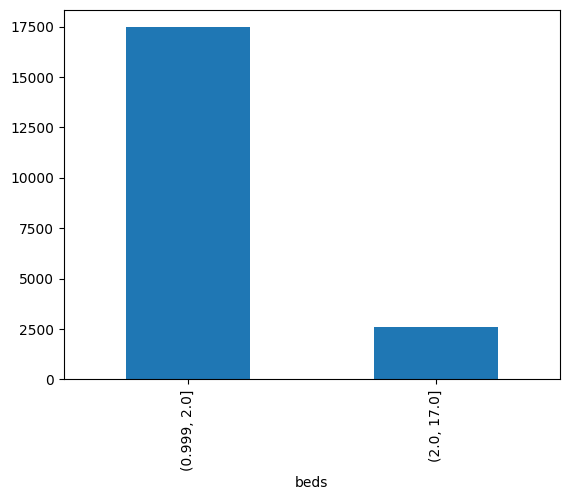

In [26]:
pd.qcut(df.beds,[0, 0.25, 0.5, 0.75, 1], duplicates= 'drop').value_counts().plot.bar()

<Axes: xlabel='beds'>

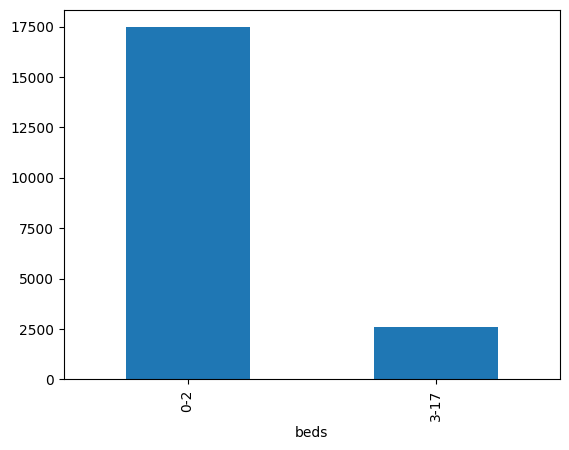

In [27]:
pd.qcut(df.beds,[0, 0.25, 0.5, 0.75, 1],labels = ['0-2', '3-17'], duplicates= 'drop').value_counts().plot.bar()

In [28]:
df['beds_disc'] = pd.qcut(df.beds,[0, 0.25, 0.5, 0.75, 1],labels = ['0-2', '3-17'], duplicates= 'drop')

Comprobamos

<Axes: xlabel='beds_disc'>

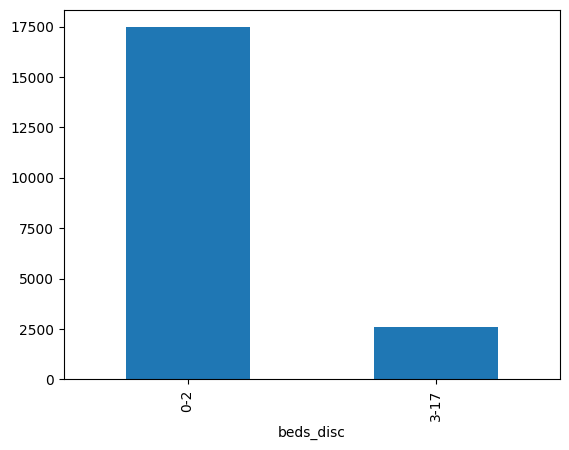

In [29]:
df['beds_disc'].value_counts().plot.bar()

**number_of_reviews**

<Axes: xlabel='number_of_reviews'>

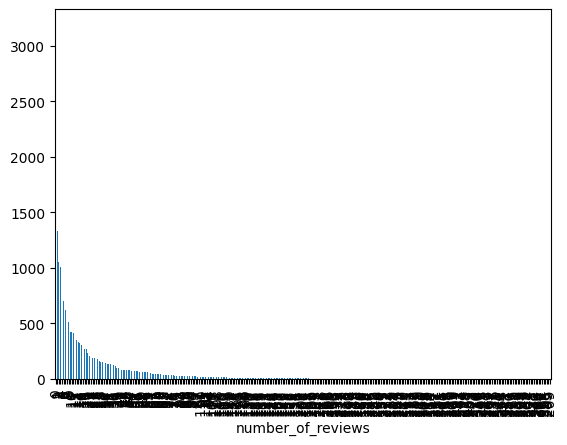

In [30]:
df['number_of_reviews'].value_counts().plot.bar()

<Axes: xlabel='number_of_reviews'>

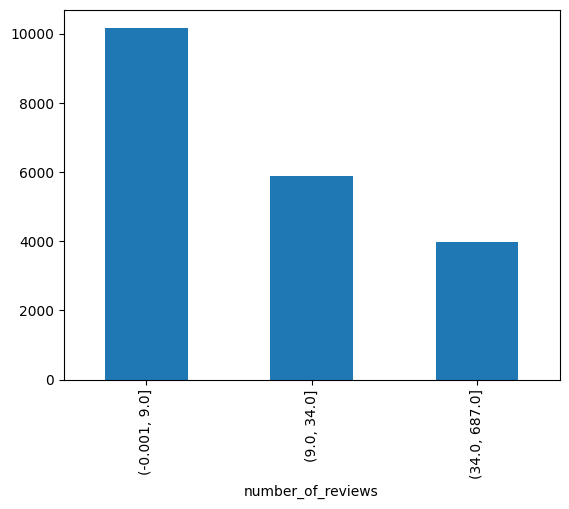

In [31]:
pd.qcut(df.number_of_reviews,[0,0.5,0.8,1]).value_counts().plot.bar()

<Axes: xlabel='number_of_reviews'>

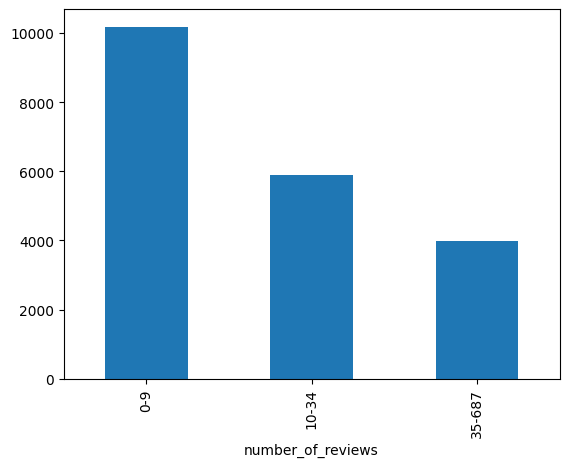

In [32]:
pd.qcut(df.number_of_reviews,[0,0.5,0.8,1],
       labels = ['0-9', '10-34', '35-687']).value_counts().plot.bar()

In [33]:
df['number_of_reviews_disc'] = pd.qcut(df.number_of_reviews,[0,0.5,0.8,1],
       labels = ['0-9', '10-34', '35-687'])

Comprobamos

<Axes: xlabel='number_of_reviews_disc'>

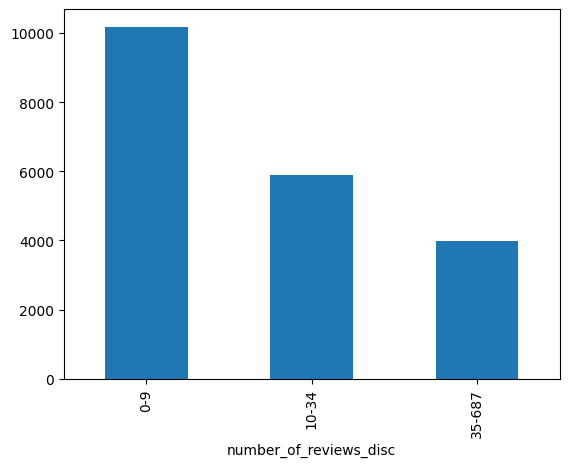

In [34]:
df['number_of_reviews_disc'].value_counts().plot.bar()

### Creación de variables con datos externos

En este caso en concreto se podrían hacer muchas cosas con datos externos.

Lo primero, que ya hemos incorporado parcialmente, es la palanca del precio del inmueble.

Decíamos que la podíamos estimar multiplicando los metros cuadrados del inmueble por el precio por m2.

El precio_m2 ya lo hemos conseguido, pero el tamaño del inmueble no lo tenemos en los datos.

Lo que podemos hacer es establecer unos criterios en base al número de habitaciones.

No es perfecto, pero nos servirá de aproximación.

**Estimación de los metros cuadrados del inmueble**

Vamos usar el siguiente algoritmo:

* una habitación: m2 = 35
* dos habitaciones: m2 = 55
* tres habitaciones: m2 = 75
* cuatro habitaciones: m2 = 100
* cinco o más habitaciones: m2 = 120

In [35]:
condiciones = [ df.bedrooms == 1,
                df.bedrooms == 2,
                df.bedrooms == 3,
                df.bedrooms == 4,
                df.bedrooms >4
              ]

resultados = [35, 55, 75, 100, 120]

df['m2'] = np.select(condiciones, resultados, default=-999)

In [36]:
df['m2'].value_counts()

m2
35     17459
55      2421
75       142
100       42
Name: count, dtype: int64

Ahora ya podemos estimar el precio de compra del inmueble.

Recordamos que al precio que nos sale le quitábamos un 30% por capacidad de negociación.

In [37]:
df['precio_compra'] = df['m2'] * df['precio_m2'] * 0.7

Comprobamos

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20064 entries, 0 to 20063
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              20064 non-null  int64   
 1   name                            20064 non-null  object  
 2   host_id                         20064 non-null  int64   
 3   neighbourhood                   20064 non-null  object  
 4   latitude                        20064 non-null  float64 
 5   longitude                       20064 non-null  float64 
 6   room_type                       20064 non-null  object  
 7   price                           20064 non-null  float64 
 8   minimum_nights                  20064 non-null  int64   
 9   calculated_host_listings_count  20064 non-null  int64   
 10  availability_365                20064 non-null  int64   
 11  neighbourhood_cleansed          20064 non-null  object  
 12  host_is_superhost 

In [39]:
df[['bedrooms', 'm2', 'barrio', 'precio_m2', 'precio_compra']]

,bedrooms,m2,barrio,precio_m2,precio_compra
0,1.0,35,Palermo,2917,71466.5
1,1.0,35,Nuñez,2643,64753.5
2,1.0,35,Constitucion,1650,40425.0
3,1.0,35,San Nicolas,1734,42483.0
4,1.0,35,Almagro,1974,48363.0
...,...,...,...,...,...
20059,1.0,35,Balvanera,1628,39886.0
20060,1.0,35,Recoleta,2510,61495.0
20061,1.0,35,Monserrat,1942,47579.0
20062,1.0,35,San Nicolas,1734,42483.0


**Cálculo de la distancia de cada inmueble al Rosedal de Palermo**

Dada la curvatura de la tierra la distancia entre dos puntos a partir de su latitud y longitud se calcula con una fórmula que se llama distancia de Haversine.

Una búsqueda en Google nos da una función ya construída para calcularla que podemos adaptar: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

In [40]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6372.8 #En km, si usas millas tienes que cambiarlo por 3959.87433

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

Creando las variables, con latitud y longitud hacia el rosedal de palermo.

In [41]:
#Las coordenadas del Rosedal de Palermo, serán lat1 y lon1
lat1 = -34.57222
lon1 = -58.41544

df['pdi_rosedal'] = df.apply(lambda registro: haversine(lat1, lon1, registro.latitude, registro.longitude), axis=1)

In [42]:
df.groupby('neighbourhood').pdi_rosedal.mean().sort_values()

neighbourhood
Palermo               1.903164
Recoleta              2.664869
Colegiales            3.140253
Chacarita             3.426625
Villa Crespo          3.534055
Almagro               3.746192
Belgrano              3.947448
Balvanera             4.025733
Retiro                4.125355
San Nicolas           4.633710
Villa Ortuzar         5.021764
Nuñez                 5.149630
Caballito             5.431717
Coghlan               5.446074
Paternal              5.531022
Monserrat             5.627970
Parque Chas           5.737269
San Cristobal         5.747780
Boedo                 6.033760
Villa Gral. Mitre     6.278648
Constitucion          6.294044
Saavedra              6.430185
Villa Urquiza         6.431215
San Telmo             6.613738
Parque Patricios      6.952869
Puerto Madero         7.056019
Parque Chacabuco      7.109320
Agronomia             7.307978
Flores                7.414495
Villa Del Parque      7.422379
Villa Santa Rita      7.590719
Barracas              7.8

Guardando...

In [43]:
df.to_sql(name = 'df_preparado', con = con, if_exists = 'replace')

20064

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20064 entries, 0 to 20063
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              20064 non-null  int64   
 1   name                            20064 non-null  object  
 2   host_id                         20064 non-null  int64   
 3   neighbourhood                   20064 non-null  object  
 4   latitude                        20064 non-null  float64 
 5   longitude                       20064 non-null  float64 
 6   room_type                       20064 non-null  object  
 7   price                           20064 non-null  float64 
 8   minimum_nights                  20064 non-null  int64   
 9   calculated_host_listings_count  20064 non-null  int64   
 10  availability_365                20064 non-null  int64   
 11  neighbourhood_cleansed          20064 non-null  object  
 12  host_is_superhost 

In [45]:
df.head()

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_cleansed,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,index,barrio,precio_m2,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_rosedal
0,14222,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,87710233,Palermo,-34.58617,-58.41036,Entire home/apt,32123.0,7,8,161,Palermo,t,2,1.0,1.0,1.0,114,4.77,4.89,4.87,45,Palermo,2917,32123.0,55,01_Una,0-2,0-2,35-687,35,71466.5,1.619848
1,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Nuñez,-34.53892,-58.46599,Private room,24230.0,29,1,0,Nuñez,f,1,1.0,1.0,1.0,0,NaN,NaN,NaN,43,Nuñez,2643,24230.0,100,01_Una,0-2,0-2,0-9,35,64753.5,5.929622
2,20429,Rental unit in Buenos Aires · 1 bedroom · 1 be...,77065,Constitucion,-34.62260,-58.38704,Entire home/apt,28268.0,15,1,0,Constitucion,f,2,1.0,1.0,1.0,0,NaN,NaN,NaN,8,Constitucion,1650,28268.0,100,01_Una,0-2,0-2,0-9,35,40425.0,6.177485
3,24713,Rental unit in Buenos Aires · ★4.66 · 1 bedroo...,100743,San Nicolas,-34.60254,-58.37811,Entire home/apt,32242.0,1,8,78,San Nicolas,t,3,1.0,1.0,2.0,377,4.66,4.90,4.84,10,San Nicolas,1734,32242.0,78,01_Una,3,0-2,35-687,35,42483.0,4.801810
4,26258,Rental unit in Buenos Aires · 1 bedroom · 2 be...,111013,Almagro,-34.59997,-58.41238,Entire home/apt,20151.0,7,1,364,Almagro,f,2,1.0,1.0,2.0,2,3.50,5.00,5.00,25,Almagro,1974,20151.0,0,01_Una,0-2,0-2,0-9,35,48363.0,3.099224
